
# Project: TMDB-Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

this dataset contains data about movies released between 1916 and 2017.
* I will go through some analysis focusing on fin-analysis through this period.
* I will also put the fin-crisis of 2007-2008 into spotlight and show its impact on movies.
* I will also show the richest decade (revenue - number of movies) 
* the impact of wars on movies production


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
df= pd.read_csv('tmdb_5000_movies.csv')

In [3]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [5]:
df.duplicated().sum()

0

> **notes**: 
* Data has some columns with null values And the format of some are hard to be handled
* Data has no duplicated values
* some columns needs to be converted to suitable data types
### Data Cleaning 

* I'll start with dropping unwanted columns & limitations to keep the wanted ones to make the data easier and readable

In [6]:
unwanted_columns= ['id','homepage','keywords','overview','production_companies','production_countries','runtime','tagline','original_title','spoken_languages','genres']
df.drop(unwanted_columns, axis=1, inplace=True)
df.head(3)

,budget,original_language,popularity,release_date,revenue,status,title,vote_average,vote_count
0,237000000,en,150.437577,2009-12-10,2787965087,Released,Avatar,7.2,11800
1,300000000,en,139.082615,2007-05-19,961000000,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,en,107.376788,2015-10-26,880674609,Released,Spectre,6.3,4466


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 9 columns):
budget               4803 non-null int64
original_language    4803 non-null object
popularity           4803 non-null float64
release_date         4802 non-null object
revenue              4803 non-null int64
status               4803 non-null object
title                4803 non-null object
vote_average         4803 non-null float64
vote_count           4803 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 337.8+ KB


* convert release date columns data type to datetime to make it easier to handle
* extract the year from release date so I can reach out more insights like the year with the most production
* fill the null values mode 
* convert year to int to be more readable
* drop release date 

In [8]:
df['release_date']= pd.to_datetime(df['release_date'])
df['year'] = pd. DatetimeIndex(df['release_date']).year
df['year'].fillna(df['year'].mode()[0], inplace= True)

In [9]:
df['year'] = df['year'].astype(int)
df.drop(columns='release_date', axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 9 columns):
budget               4803 non-null int64
original_language    4803 non-null object
popularity           4803 non-null float64
revenue              4803 non-null int64
status               4803 non-null object
title                4803 non-null object
vote_average         4803 non-null float64
vote_count           4803 non-null int64
year                 4803 non-null int32
dtypes: float64(2), int32(1), int64(3), object(3)
memory usage: 319.0+ KB


In [11]:
df.head(2)

,budget,original_language,popularity,revenue,status,title,vote_average,vote_count,year
0,237000000,en,150.437577,2787965087,Released,Avatar,7.2,11800,2009
1,300000000,en,139.082615,961000000,Released,Pirates of the Caribbean: At World's End,6.9,4500,2007


* getting some info through describe()
* making some visuals to conclude insights used to answer the questions

In [12]:
df.describe()

,budget,popularity,revenue,vote_average,vote_count,year
count,4.803000e+03,4803.000000,4.803000e+03,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,6.092172,690.217989,2002.470123
std,4.072239e+07,31.816650,1.628571e+08,1.194612,1234.585891,12.413419
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1916.000000
25%,7.900000e+05,4.668070,0.000000e+00,5.600000,54.000000,1999.000000
50%,1.500000e+07,12.921594,1.917000e+07,6.200000,235.000000,2005.000000
75%,4.000000e+07,28.313505,9.291719e+07,6.800000,737.000000,2011.000000
max,3.800000e+08,875.581305,2.787965e+09,10.000000,13752.000000,2017.000000


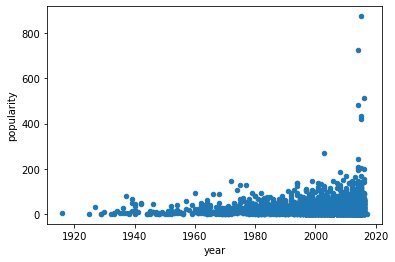

In [13]:
df.plot(kind='scatter', x='year', y='popularity');

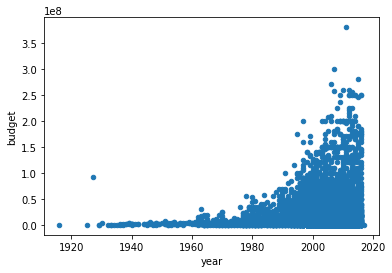

In [14]:
df.plot(kind='scatter', x='year', y='budget');

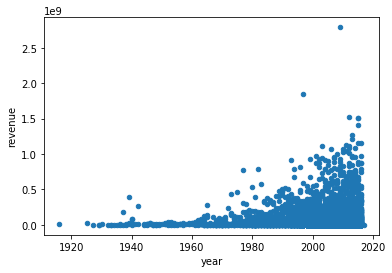

In [15]:
df.plot(kind='scatter', x='year', y='revenue');

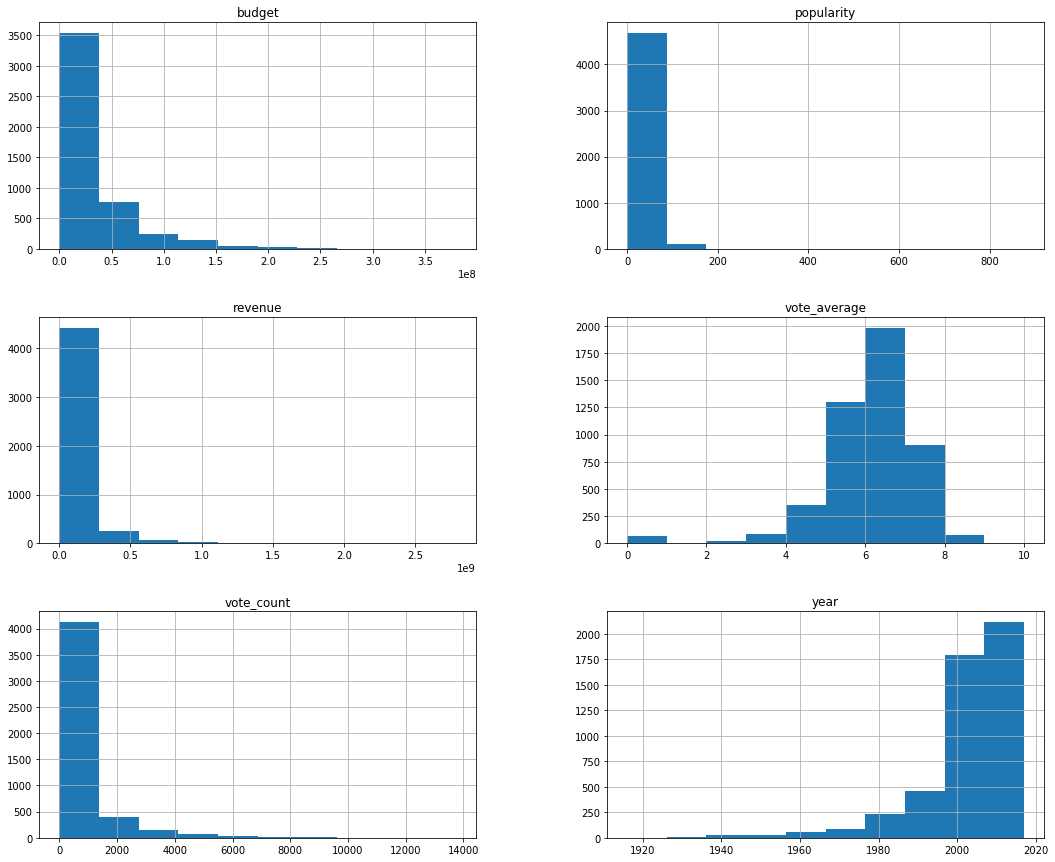

In [16]:
df.hist(figsize = (18,15));

* budget, popularity, revenue and vote counts are skewed right
* vote average mostly normally distributed

In [17]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [1915, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2017]
bin_names = ['20s' , '30s', '40s', '50s', '60s', '70s', '80s', '90s','2000s', '2010s']

In [18]:
# grouping the movies into decades
df['decade'] = pd.cut(df['year'], bin_edges, labels=bin_names)

In [19]:
df.sample(5)

,budget,original_language,popularity,revenue,status,title,vote_average,vote_count,year,decade
241,135000000,en,39.873791,245623848,Released,Teenage Mutant Ninja Turtles: Out of the Shadows,5.8,963,2016,2010s
3826,5000000,en,1.398981,0,Released,Chain of Command,5.3,11,2015,2010s
1234,40000000,en,7.832337,30199105,Released,The Art of War,5.6,135,2000,90s
296,100000000,en,20.652943,211989043,Released,End of Days,5.5,482,1999,90s
3440,4800000,de,11.086001,79384880,Released,"Good bye, Lenin!",7.4,586,2003,2000s


In [20]:
# getting rid of Bad data
df = df.drop(df[(df['budget'] == 0) | (df['revenue'] == 0)].index)

In [35]:
df.describe()

,budget,popularity,revenue,vote_average,vote_count,year
count,3.229000e+03,3229.000000,3.229000e+03,3229.000000,3229.000000,3229.000000
mean,4.065444e+07,29.033689,1.212430e+08,6.309353,977.287395,2001.680396
std,4.439674e+07,36.165730,1.863029e+08,0.873891,1414.309577,13.279525
min,1.000000e+00,0.019984,5.000000e+00,0.000000,0.000000,1916.000000
25%,1.050000e+07,10.446722,1.700000e+07,5.800000,178.000000,1998.000000
50%,2.500000e+07,20.410354,5.518472e+07,6.300000,471.000000,2005.000000
75%,5.500000e+07,37.335721,1.462920e+08,6.900000,1148.000000,2010.000000
max,3.800000e+08,875.581305,2.787965e+09,8.500000,13752.000000,2016.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4798
Data columns (total 10 columns):
budget               3229 non-null int64
original_language    3229 non-null object
popularity           3229 non-null float64
revenue              3229 non-null int64
status               3229 non-null object
title                3229 non-null object
vote_average         3229 non-null float64
vote_count           3229 non-null int64
year                 3229 non-null int32
decade               3229 non-null category
dtypes: category(1), float64(2), int32(1), int64(3), object(3)
memory usage: 243.2+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Q1**: which decade was the highest in revenue? which one was the highest in budgets? which one had the biggest number of movies?

> **Q2**: what was the most popular decade? which decade has the highest ratings?

> **Q3**: Does FIN-crisis of 2007-08 affect movies' budgets, revenues and number?

> **Q4**: what was the impact of WWI & WWII on movies production?


### Research Question 1 (which decade was the highest in revenue? which one was the highest in budgets? which one had the biggest number of movies?)
* group data by decade to determine the answers 

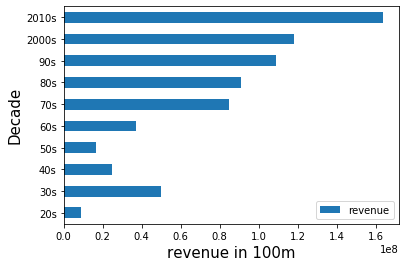

In [22]:
df.groupby('decade')['revenue'].mean().plot(kind='barh')
plt.xlabel('revenue in 100m', fontsize=15)
plt.ylabel('Decade', fontsize= 15)
plt.legend();

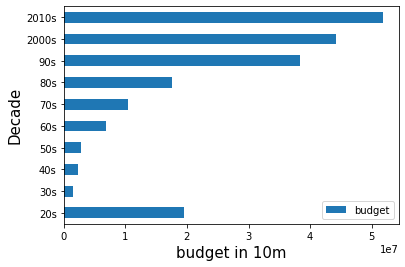

In [23]:
df.groupby('decade')['budget'].mean().plot(kind='barh')
plt.xlabel('budget in 10m', fontsize=15)
plt.ylabel('Decade', fontsize= 15)
plt.legend();

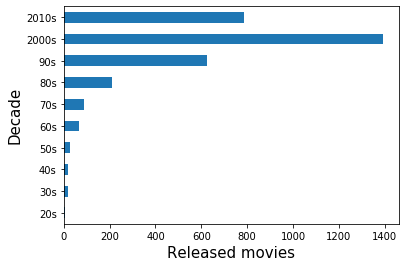

In [24]:
df.groupby('decade')['popularity'].count().plot(kind='barh');
plt.xlabel('Released movies', fontsize=15);
plt.ylabel('Decade', fontsize= 15);

### Research Question 2  (what was the most popular decade? which decade has the highest ratings?)
* compare the popularity & ratings over decades

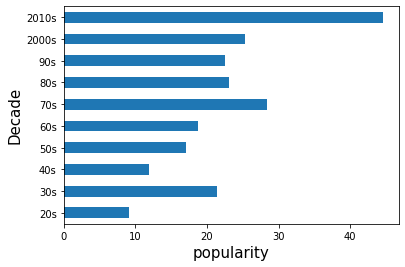

In [25]:
df.groupby('decade')['popularity'].mean().plot(kind='barh');
plt.xlabel('popularity', fontsize=15);
plt.ylabel('Decade', fontsize= 15);

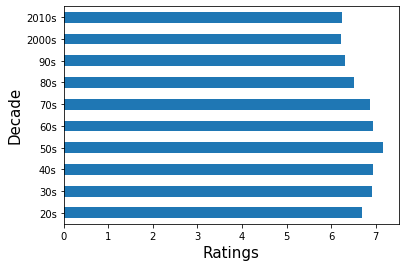

In [26]:
df.groupby('decade')['vote_average'].mean().plot(kind='barh');
plt.xlabel('Ratings', fontsize=15);
plt.ylabel('Decade', fontsize= 15);

## Researsh Question 3 (Does FIN-crisis of 2007-08 affect movies' budgets, revenues and number?)
* make a new dataframe to make it easier to focus on that period
* used 'year' to follow the production before, over and after the crisis

In [27]:
fin_crisis = df.query('year > 2002') 

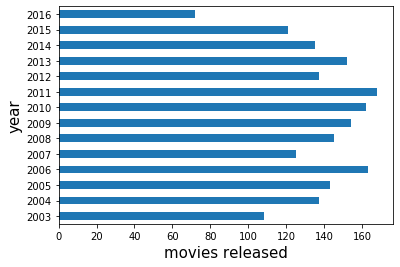

In [28]:
fin_crisis.groupby('year')['popularity'].count().plot(kind= 'barh');
plt.xlabel('movies released', fontsize=15);
plt.ylabel('year', fontsize=15);

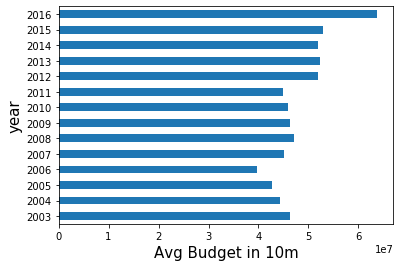

In [29]:
fin_crisis.groupby('year')['budget'].mean().plot(kind= 'barh');
plt.xlabel('Avg Budget in 10m', fontsize=15);
plt.ylabel('year', fontsize=15);

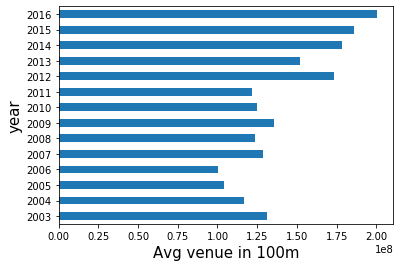

In [30]:
fin_crisis.groupby('year')['revenue'].mean().plot(kind= 'barh');
plt.xlabel('Avg venue in 100m', fontsize=15);
plt.ylabel('year', fontsize=15);

## Researsh Question 4 (what was the impact of WWI & WWII on movies production?)
* make new data frame to track the production through WWI & WWII and the period between them
* kept track of budget & revenue during wars 

In [31]:
ww_impact = df.query('year < 1950')

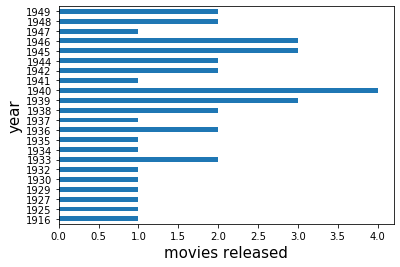

In [32]:
ww_impact.groupby('year')['popularity'].count().plot(kind='barh');
plt.xlabel('movies released', fontsize=15);
plt.ylabel('year', fontsize=15);

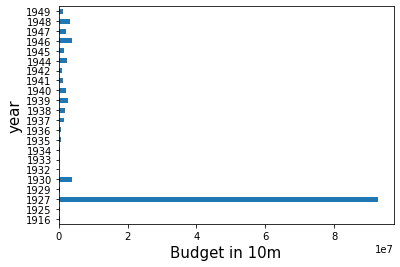

In [33]:
ww_impact.groupby('year')['budget'].mean().plot(kind='barh');
plt.xlabel('Budget in 10m', fontsize=15);
plt.ylabel('year', fontsize=15);

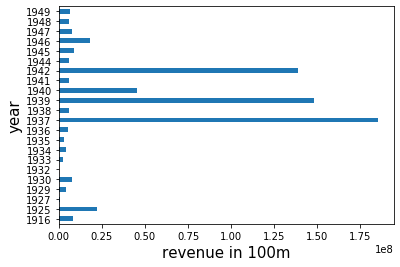

In [34]:
ww_impact.groupby('year')['revenue'].mean().plot(kind='barh');
plt.xlabel('revenue in 100m', fontsize=15);
plt.ylabel('year', fontsize=15);

<a id='conclusions'></a>
## Conclusions

> **1-**: Movies production are naturally growing and its revenue is increasing

> **2-**: After 1950s the ratings are decreasing

> **3-**: The production can be affected by econimiacal crisis

> **4-**: During WWs the production is rare but gains much money (these periods is famous for war movies to mark the heroic stories of wars and cheer people)

## Limitations:

> **1-**: genre format is too complex to be handeled

> **2-**: Production countries and production companies formats are hard to be handeled

> **3-**: overview 

> **4-**: spoken language and keywords formats